<a href="https://colab.research.google.com/github/migueloropeza/Challenge-Telecom-X-Parte2/blob/main/TelecomX_parte2_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline

In [2]:
#Extraccion de datos
url = 'https://raw.githubusercontent.com/migueloropeza/Challenge-Telecom-X-Parte2/refs/heads/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.80


In [3]:
# Eliminacion de la Columna costomerID
datos.drop('customerID', axis=1, inplace=True)

In [4]:
datos.sample(10)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
2748,0,female,0,0,0,14,1,no,dsl,Yes,...,no,yes,no,no,one year,0,mailed check,55.70,795.15,1.86
7194,0,female,0,0,0,1,0,no phone service,dsl,No,...,no,no,no,no,month-to-month,0,mailed check,24.40,24.40,0.81
4368,0,female,0,0,0,16,1,no,fiber optic,No,...,no,no,no,yes,month-to-month,1,electronic check,86.25,1340.10,2.88
1227,0,male,0,0,0,39,1,no,no,No internet service,...,no internet service,no internet service,no internet service,no internet service,one year,0,mailed check,19.90,791.15,0.66
1197,0,female,1,0,0,46,1,no,fiber optic,No,...,yes,no,yes,no,one year,1,bank transfer (automatic),91.30,4126.35,3.04
1592,0,male,0,1,1,51,1,yes,no,No internet service,...,no internet service,no internet service,no internet service,no internet service,two year,1,mailed check,24.95,1222.25,0.83
5926,0,male,0,0,0,72,1,yes,no,No internet service,...,no internet service,no internet service,no internet service,no internet service,two year,0,bank transfer (automatic),24.75,1777.60,0.82
6683,1,female,0,1,0,7,1,no,fiber optic,No,...,yes,no,no,no,month-to-month,1,bank transfer (automatic),75.15,496.90,2.51
6050,0,female,0,1,1,7,0,no phone service,dsl,Yes,...,no,yes,no,no,month-to-month,0,mailed check,34.65,246.60,1.16
1698,0,female,0,1,1,61,0,no phone service,dsl,Yes,...,no,yes,no,yes,one year,1,bank transfer (automatic),50.70,3088.75,1.69


In [28]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   int64  
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   int64  
 3   customer.Partner           7267 non-null   int64  
 4   customer.Dependents        7267 non-null   int64  
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   int64  
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   objec

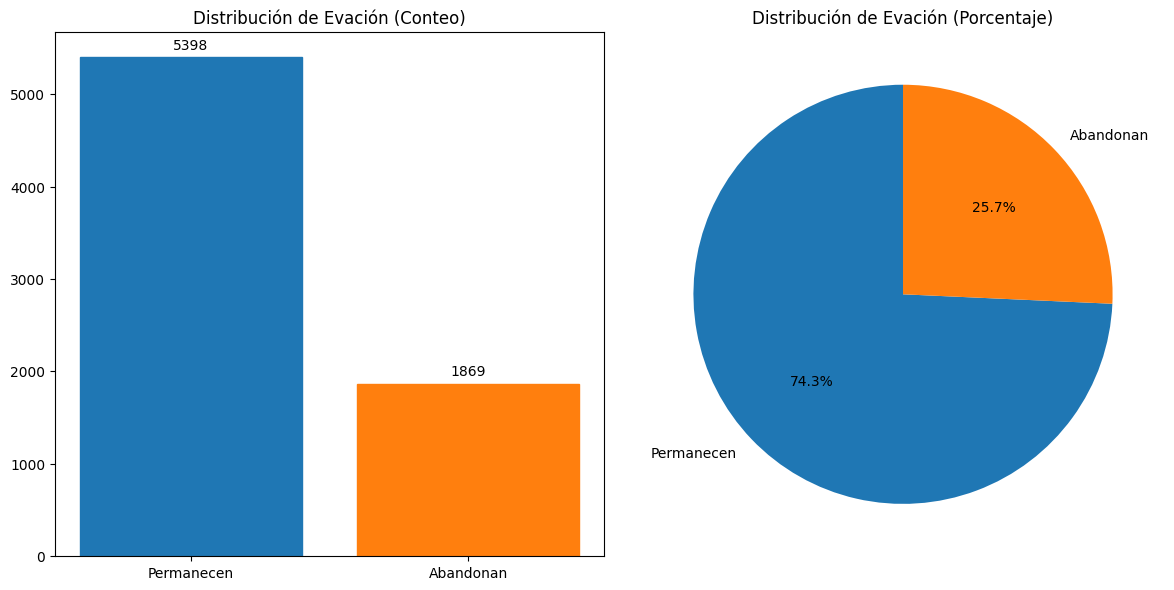

In [23]:
# Distribucion de evasión
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

churn_counts = datos['Churn'].value_counts()
bars = axes[0].bar(['Permanecen', 'Abandonan'], churn_counts)
axes[0].set_title('Distribución de Evación (Conteo)')

for bar in bars:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 50, yval, ha='center', va='bottom')

pie_wedges, pie_texts, autopct_texts = axes[1].pie(churn_counts, labels=['Permanecen', 'Abandonan'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribución de Evación (Porcentaje)')

pie_colors = [wedge.get_facecolor() for wedge in pie_wedges]

for i, bar in enumerate(bars):
    bar.set_color(pie_colors[i])

plt.tight_layout()
plt.show()

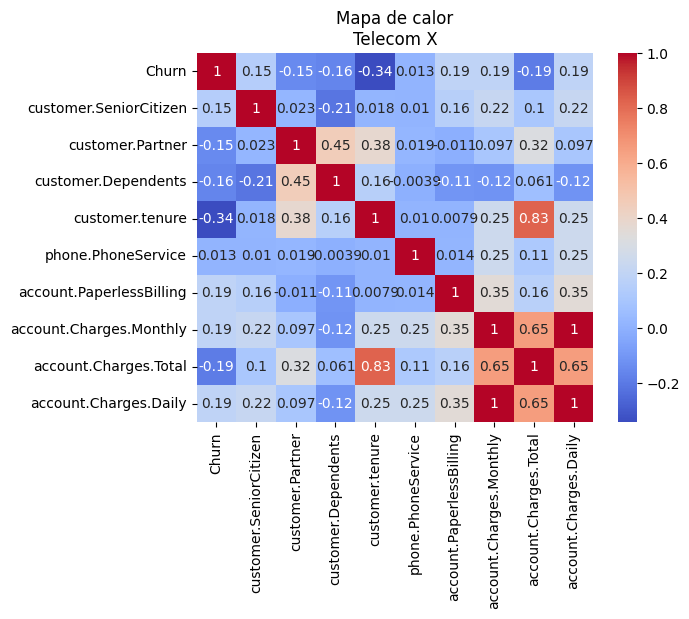

In [27]:
# Seleccionando las columnas numéricas
num_cols = datos.select_dtypes(include=[np.number]).columns

# Creando el mapa de calor
sns.heatmap(datos[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de calor\nTelecom X")
plt.show()

In [29]:
datos.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [34]:
# Dividiendo las features y target
y = datos.Churn
X = datos.drop(["Churn", "account.Charges.Daily", "account.Charges.Total"], axis=1)

# Dividiendo los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [37]:
# División de columnas para las transformaciones
# Identificamos las columnas numéricas y categóricas para aplicar diferentes preprocesamientos
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Instanciando las funciones de preprocesamiento
# Usamos RobustScaler para escalar las columnas numéricas, ya que es robusto a valores atípicos
scaler = RobustScaler()
# Usamos OneHotEncoder para convertir las columnas categóricas a un formato numérico (one-hot)
onehot = OneHotEncoder(handle_unknown="ignore") # handle_unknown="ignore" permite manejar categorías desconocidas en el futuro

# Tubería para el preprocesamiento
# Creamos un ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas
transformer = ColumnTransformer(transformers=[
    ("scaler", scaler, num_cols),
    ("onehot", onehot, cat_cols)
])

# Instanciando el modelo de baseline
# DummyClassifier es un clasificador simple que sirve como baseline para comparar con modelos más complejos
# strategy="most_frequent" predice siempre la clase más frecuente en los datos de entrenamiento
model = DummyClassifier(strategy="most_frequent")

# Creando la tubería para el modelo baseline
# Creamos una tubería que primero transforma los datos y luego aplica el modelo
pipe = Pipeline(steps=[
    ("transformer", transformer),
    ("model", model)
])

# Entrenando el modelo
# Entrenamos la tubería completa con los datos de entrenamiento
pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  ['customer.SeniorCitizen',
                                                   'customer.Partner',
                                                   'customer.Dependents',
                                                   'customer.tenure',
                                                   'phone.PhoneService',
                                                   'account.PaperlessBilling',
                                                   'account.Charges.Monthly']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['customer.gender',
                                                   'phone.MultipleLines',
                                                   'internet.InternetService',
                                                   'internet.OnlineSecurity',
                                                   'internet.OnlineBackup',
                                                   'internet.DeviceProtection',
                                                   'internet.TechSupport',
                                                   'internet.StreamingTV',
                                                   'internet.StreamingMovies',
                                                   'account.Contract',
                                                   'account.PaymentMethod'])])),
                ('model', DummyClassifier(strategy='most_frequent'))])

In [38]:
# Realizando predicciones en el conjunto de prueba
y_pred = pipe.predict(X_test)

# Mostrando las primeras 10 predicciones
print("Primeras 10 predicciones:", y_pred[:10])

Primeras 10 predicciones: [0 0 0 0 0 0 0 0 0 0]


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculando métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7428
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Matriz de Confusión:
[[1080    0]
 [ 374    0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1080
           1       0.00      0.00      0.00       374

    accuracy                           0.74      1454
   macro avg       0.37      0.50      0.43      1454
weighted avg       0.55      0.74      0.63      1454



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Instanciando el modelo Random Forest
# Puedes ajustar los parámetros (como n_estimators, max_depth, etc.) para optimizar el modelo
rf_model = RandomForestClassifier(random_state=42)

# Creando la tubería para el modelo Random Forest
# Reutilizamos el 'transformer' que ya definimos
rf_pipe = Pipeline(steps=[
    ("transformer", transformer),
    ("model", rf_model)
])

# Entrenando el modelo Random Forest
print("Entrenando el modelo Random Forest...")
rf_pipe.fit(X_train, y_train)
print("Entrenamiento completado.")

Entrenando el modelo Random Forest...
Entrenamiento completado.


In [41]:
# Realizando predicciones con el modelo Random Forest en el conjunto de prueba
y_pred_rf = rf_pipe.predict(X_test)

# Mostrando las primeras 10 predicciones
print("Primeras 10 predicciones del modelo Random Forest:", y_pred_rf[:10])

Primeras 10 predicciones del modelo Random Forest: [0 1 0 0 0 1 0 0 0 1]


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculando métricas de evaluación para el modelo Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-score: {f1_rf:.4f}")

# Matriz de confusión para el modelo Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMatriz de Confusión (Random Forest):")
print(conf_matrix_rf)

# Reporte de clasificación para el modelo Random Forest
print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7799
Random Forest Precision: 0.5894
Random Forest Recall: 0.4759
Random Forest F1-score: 0.5266

Matriz de Confusión (Random Forest):
[[956 124]
 [196 178]]

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1080
           1       0.59      0.48      0.53       374

    accuracy                           0.78      1454
   macro avg       0.71      0.68      0.69      1454
weighted avg       0.77      0.78      0.77      1454



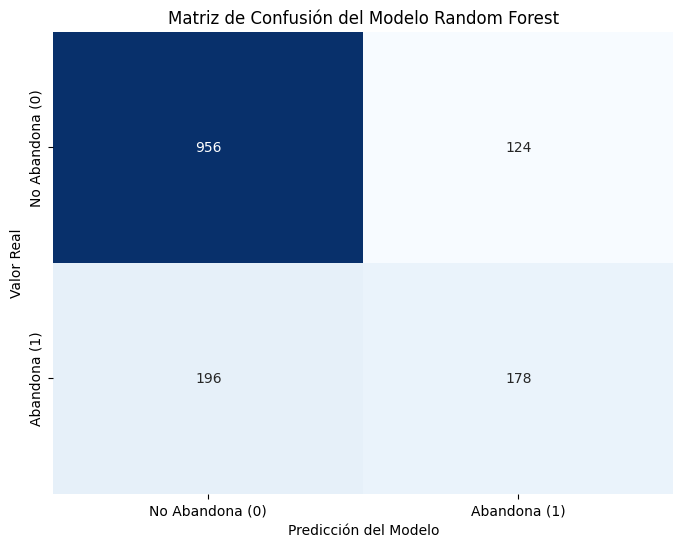

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión para el modelo Random Forest (ya calculada como conf_matrix_rf)
# Si no la tienes, puedes calcularla con:
# conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Abandona (0)', 'Abandona (1)'],
            yticklabels=['No Abandona (0)', 'Abandona (1)'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.show()

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
# Instanciando el modelo Gradient Boosting
# Puedes ajustar los parámetros (como n_estimators, learning_rate, etc.) para optimizar el modelo
gbm_model = GradientBoostingClassifier(random_state=42)

# Creando la tubería para el modelo Gradient Boosting
# Reutilizamos el 'transformer' que ya definimos
gbm_pipe = Pipeline(steps=[
    ("transformer", transformer),
    ("model", gbm_model)
])

In [46]:
# Entrenando el modelo Gradient Boosting
print("Entrenando el modelo Gradient Boosting...")
gbm_pipe.fit(X_train, y_train)
print("Entrenamiento completado.")

Entrenando el modelo Gradient Boosting...
Entrenamiento completado.


## Realizar predicciones

### Subtask:
Utilizar el modelo entrenado para hacer predicciones sobre los datos de prueba (`X_test`).


**Reasoning**:
Use the trained Gradient Boosting model pipeline to make predictions on the test data.



In [47]:
# Realizando predicciones con el modelo Gradient Boosting en el conjunto de prueba
y_pred_gbm = gbm_pipe.predict(X_test)

# Mostrando las primeras 10 predicciones
print("Primeras 10 predicciones del modelo Gradient Boosting:", y_pred_gbm[:10])

Primeras 10 predicciones del modelo Gradient Boosting: [0 1 0 0 0 0 0 0 0 0]


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculando métricas de evaluación para el modelo Gradient Boosting
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)

print(f"Gradient Boosting Accuracy: {accuracy_gbm:.4f}")
print(f"Gradient Boosting Precision: {precision_gbm:.4f}")
print(f"Gradient Boosting Recall: {recall_gbm:.4f}")
print(f"Gradient Boosting F1-score: {f1_gbm:.4f}")

# Matriz de confusión para el modelo Gradient Boosting
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print("\nMatriz de Confusión (Gradient Boosting):")
print(conf_matrix_gbm)

# Reporte de clasificación para el modelo Gradient Boosting
print("\nReporte de Clasificación (Gradient Boosting):")
print(classification_report(y_test, y_pred_gbm))

Gradient Boosting Accuracy: 0.8109
Gradient Boosting Precision: 0.6725
Gradient Boosting Recall: 0.5160
Gradient Boosting F1-score: 0.5840

Matriz de Confusión (Gradient Boosting):
[[986  94]
 [181 193]]

Reporte de Clasificación (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1080
           1       0.67      0.52      0.58       374

    accuracy                           0.81      1454
   macro avg       0.76      0.71      0.73      1454
weighted avg       0.80      0.81      0.80      1454



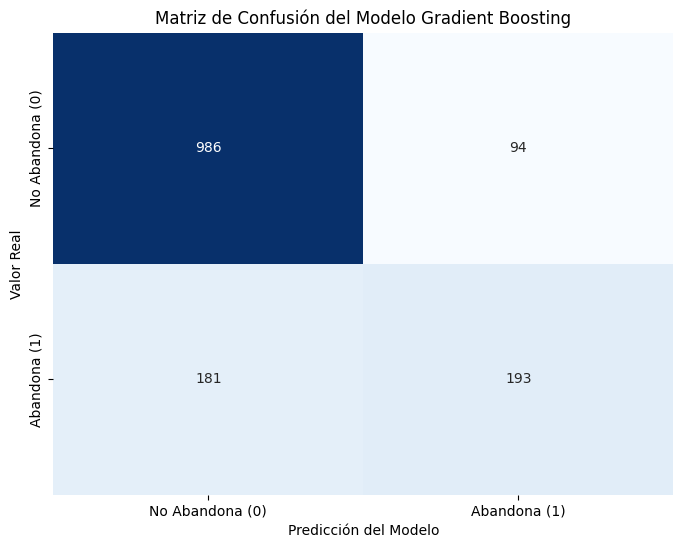

In [49]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Abandona (0)', 'Abandona (1)'],
            yticklabels=['No Abandona (0)', 'Abandona (1)'])
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo Gradient Boosting')
plt.show()

In [51]:
print("Comparison of Model Performance:\n")

# Dummy Classifier metrics
print(f"Dummy Classifier:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}\n")

# Random Forest metrics
print(f"Random Forest:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1-score: {f1_rf:.4f}\n")

# Gradient Boosting metrics
print(f"Gradient Boosting Machines:")
print(f"  Accuracy: {accuracy_gbm:.4f}")
print(f"  Precision: {precision_gbm:.4f}")
print(f"  Recall: {recall_gbm:.4f}")
print(f"  F1-score: {f1_gbm:.4f}\n")


Comparison of Model Performance:

Dummy Classifier:
  Accuracy: 0.7428
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000

Random Forest:
  Accuracy: 0.7799
  Precision: 0.5894
  Recall: 0.4759
  F1-score: 0.5266

Gradient Boosting Machines:
  Accuracy: 0.8109
  Precision: 0.6725
  Recall: 0.5160
  F1-score: 0.5840



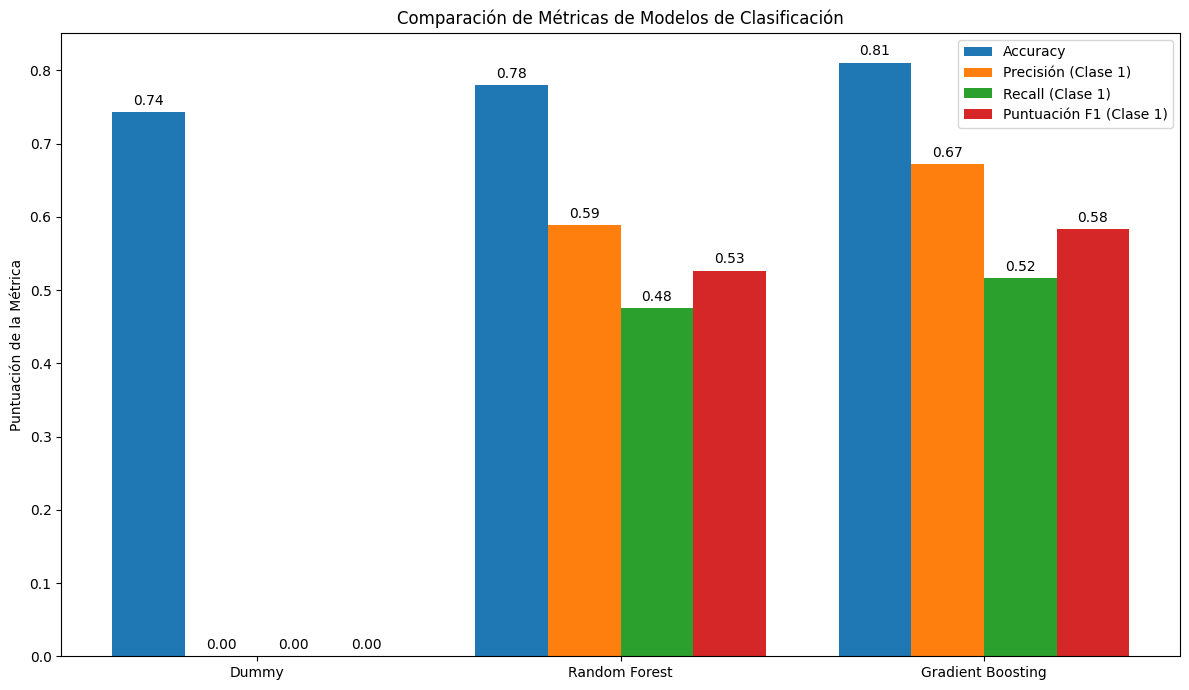

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Métricas de los modelos (obtenidas de las celdas de evaluación anteriores)
models = ['Dummy', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [accuracy, accuracy_rf, accuracy_gbm]
precision_scores = [precision, precision_rf, precision_gbm]
recall_scores = [recall, recall_rf, recall_gbm]
f1_scores = [f1, f1_rf, f1_gbm]

x = np.arange(len(models))  # las localizaciones de las etiquetas
width = 0.2  # el ancho de las barras

fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precisión (Clase 1)')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall (Clase 1)')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='Puntuación F1 (Clase 1)')


# Añade algo de texto para las etiquetas, títulos, etc.
ax.set_ylabel('Puntuación de la Métrica')
ax.set_title('Comparación de Métricas de Modelos de Clasificación')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Función para añadir etiquetas a las barras
def autolabel(rects):
    """Adjunta una etiqueta encima de cada barra en *rects*, mostrando su altura."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

## 🎯 Estrategias de Retención Sugeridas
1. Segmentación y Acción Proactiva

- Identificar a clientes en riesgo (contrato mensual, baja antigüedad, sin servicios adicionales).

- Aplicar campañas específicas para migrarlos a contratos más largos con beneficios tangibles.

2. Incentivar Contratos a Largo Plazo

- Ofrecer descuentos o paquetes especiales por cambiar a contrato anual o bianual.

- Combinar con promociones en servicios de internet o streaming.

3. Automatización y Mejora de Métodos de Pago

- Fomentar el uso de pagos automáticos con beneficios (descuentos o puntos).

- Detectar clientes con métodos menos confiables (como electronic check) e incentivarlos a cambiar.

4. Ofrecer Paquetes con Servicios de Valor Agregado

- Crear bundles con servicios de internet, streaming, seguridad y soporte técnico.

- Ofrecer pruebas gratuitas de servicios adicionales para aumentar adopción.

5. Programas de Lealtad y Recompensas

- Recompensar a los clientes según su antigüedad con descuentos, upgrades o servicios gratuitos.

- Promover el sentido de pertenencia y fidelidad a la marca.

6. Monitoreo de Clientes con Altos Cargos

- Identificar a clientes con facturación elevada y hacer seguimiento personalizado (encuestas, llamadas de satisfacción).

- Detectar señales tempranas de insatisfacción.

Conclusiones Generales


1. Factores más influyentes en la cancelación de clientes (churn):


- Tipo de contrato: Los contratos mensuales tienen mayor riesgo de cancelación. Contratos anuales/bianuales retienen mejor.

- Antigüedad del cliente (tenure): A menor antigüedad, mayor probabilidad de cancelación.

- Servicio de internet: Su presencia y calidad influyen significativamente en la permanencia.

- Montos mensuales elevados: Clientes con cargos altos pueden tener menor tolerancia al servicio deficiente.

- Servicios adicionales (streaming, seguridad, soporte): Aumentan el valor percibido, pero su falta puede incentivar el churn.

- Método de pago: Métodos como "electronic check" están asociados con mayor abandono.

2. Modelo de análisis sólido:

- Se construyó modelos robusto con técnicas modernas.

- La interpretabilidad del modelo permite tomar decisiones accionables basadas en datos.